# Fitting a sine wave


In [191]:
# import packages, set random seed

# import packages, set random seed
random_seed = 36

import random
random.seed(random_seed)
import numpy as np
np.random.seed(random_seed)
import tensorflow as tf
tf.random.set_seed(random_seed)
import matplotlib.pyplot as plt
import matplotlib as mpl

# set random seed
np.random.seed(int(random_seed))
tf.random.set_seed(int(random_seed))

# nice figures
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['font.size'] = 12


## Make data
First we make the data to fit, Nsamples between -1 and 1 for input, and sin(x) as output

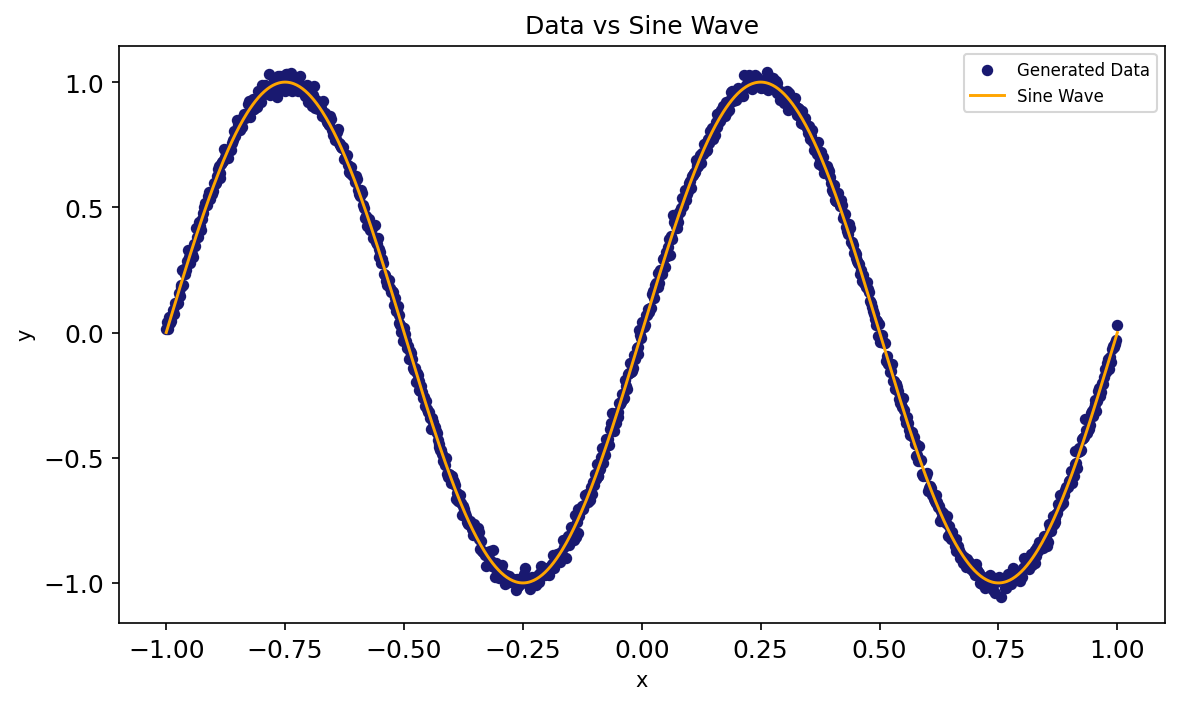

In [192]:
import numpy as np
Nsamples = 1000
np.random.seed(int(random_seed))
xdata = np.linspace(-1,1,Nsamples) #our data
ydata = np.sin(2*np.pi*xdata)+np.random.normal(0,0.02,Nsamples) #our data
sine = np.sin(2*np.pi*xdata)

figure = plt.figure(figsize = (9,5))
plt.title('Data vs Sine Wave', fontsize = 12)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.scatter(xdata,ydata, s=20,color='midnightblue', label = 'Generated Data')
plt.plot(xdata,sine,color='orange',linewidth=1.4, label='Sine Wave')
plt.legend(fontsize=8)
plt.savefig(f'Data.png',bbox_inches='tight',dpi=150, format='png')

plt.show()

## Split the data

In [193]:
#shuffle index
index_x = list(range(1000))
index_y = list(range(1000))

random_index = random.sample(index_x,len(index_x))

xrandom = xdata[random_index]
yrandom = ydata[random_index]
data_len = len(xdata)
#training data
xtrain = xrandom[0:int((data_len)*0.5)]
ytrain = yrandom[0:int((data_len)*0.5)]
#validation data
xval = xrandom[int((data_len)*0.5):int((data_len)*0.75)]
yval = yrandom[int((data_len)*0.5):int((data_len)*0.75)]
#test data
xtest = xrandom[int((data_len)*0.75):]
ytest = yrandom[int((data_len)*0.75):]
#print(len(index_x))

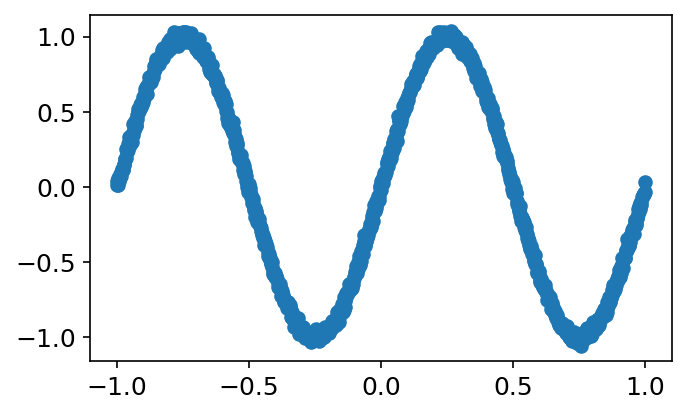

In [194]:
plt.figure(figsize=(5,3))
plt.scatter(xrandom,yrandom)
#plt.plot(xdata,sine,color='orange',linewidth=0.8)
plt.show()

<Figure size 1050x600 with 0 Axes>

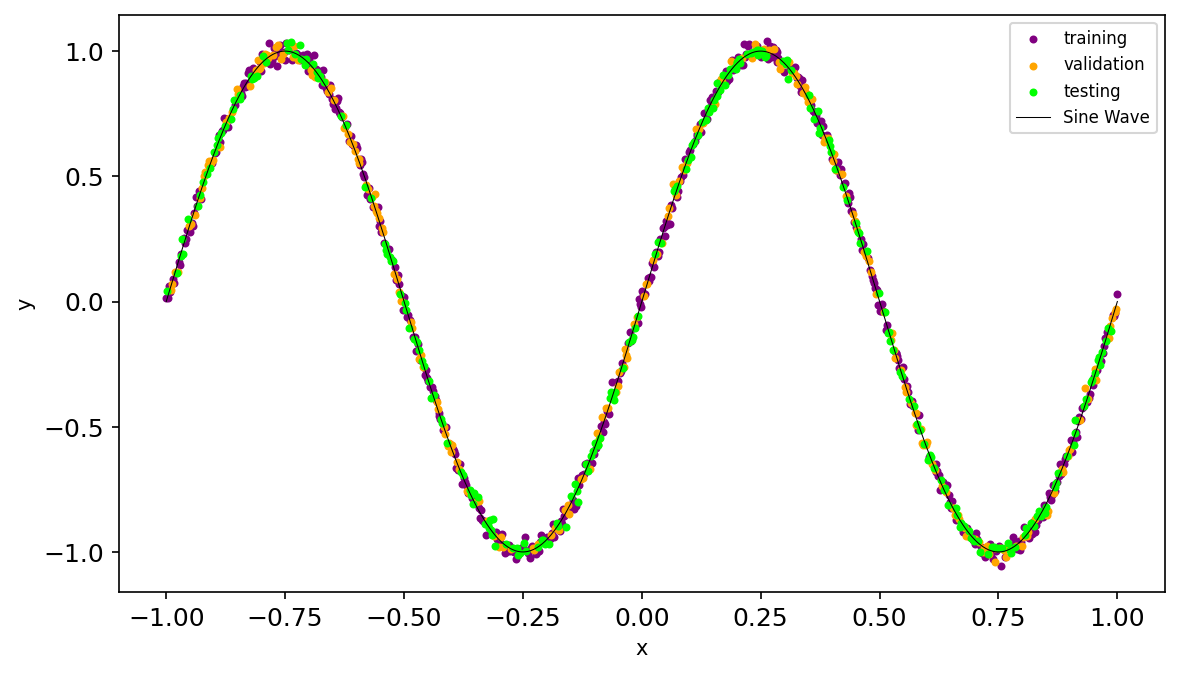

In [195]:
figure = plt.figure(figsize = (7,4))
figure = plt.figure(figsize = (9,5))
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.scatter(xtrain,ytrain, label = 'training', marker='o', color='purple', s=8)
plt.scatter(xval,yval, label = 'validation', marker = 'o', color='orange', s=8)
plt.scatter(xtest,ytest, label = 'testing', marker='o',color='lime', s =8)
plt.plot(xdata,sine,color='k',linewidth=0.5, label='Sine Wave')
plt.legend(fontsize=8)

plt.savefig(f'SplitData.png',bbox_inches='tight',dpi=150, format='png')



## Set some neural network parameters
Here we define parts of the neural network architecture and hyper-parameters

In [196]:
lr = 0.01  #learning rate
batch_size = 32
n_epochs = 60 #number of training epochs
activation = 'relu' #activation function on hidden layers
hiddens = [128,128] #hidden layers e.g. [5,8] is two hiddens layers the first with 5 nodes and the second with 8 nodes
loss = 'mse' #loss function

## Make and train the model

In [197]:
#the model takes in input xtrain, ytrain and is evaluated using xval yval during training
#xtrain,ytrain,xval,yval must be numpy arrays of dimension (n_samples,)


nhiddens = len(hiddens)

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(hiddens[0], activation=activation, input_shape=(1,),
                bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                ))

# and the rest of the layers
for ilayer in range(1,nhiddens):
    model.add(tf.keras.layers.Dense(hiddens[ilayer], activation=activation,
                    bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                    kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                    ))

# final layer
model.add(tf.keras.layers.Dense(1,activation='linear',
                bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),))


model.compile(optimizer=tf.keras.optimizers.Adam(lr),  # optimizer
            loss=loss,   # loss function
            metrics=['mae','mse'])

history = model.fit(xtrain, ytrain, epochs=n_epochs, batch_size=batch_size, validation_data=(xval, yval),
                shuffle=True, verbose=0)

#The training and validation losses hystory are saved in the variable history.
#You can use history.history['loss'] to plot the training loss and history.history['val_loss'],
#to plot the validation loss
#To evaluate the model you can use ypred = model.predict(xtest), the predictions are saved
#in the variable y_pred

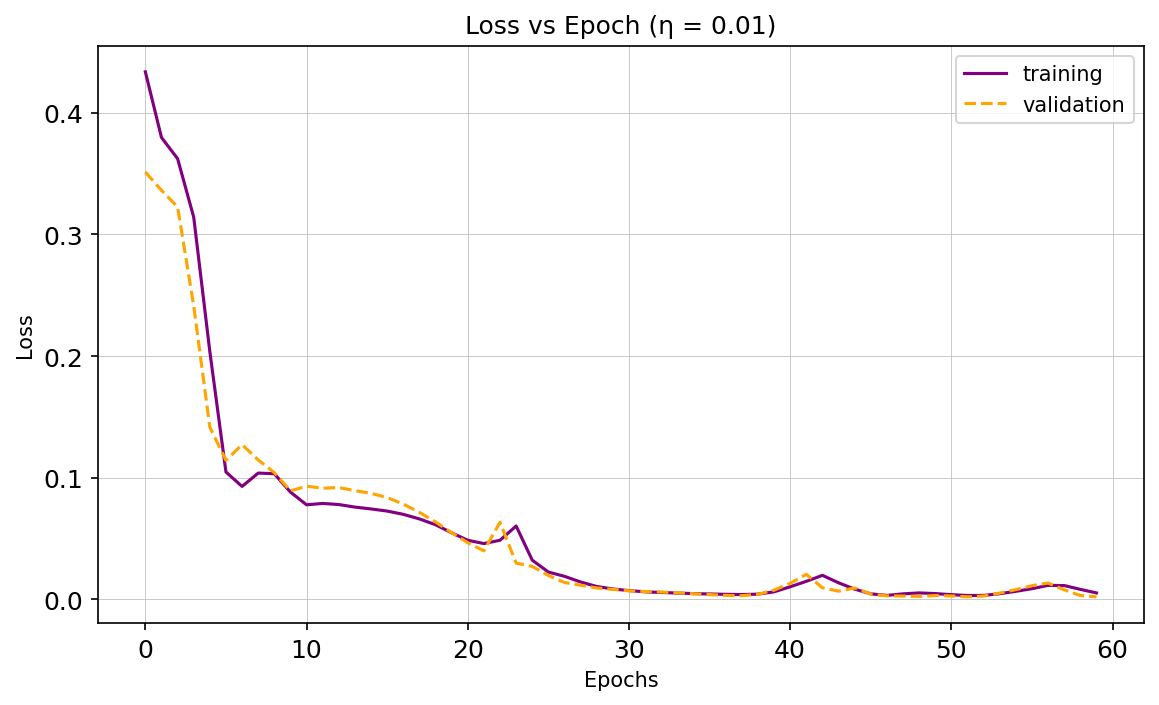

In [198]:
n = list(range(n_epochs))
figure = plt.figure(figsize = (9,5))
plt.title('Loss vs Epoch (η = 0.01)', fontsize=12)
plt.plot(n,history.history['loss'], color='purple',label='training')
plt.plot(n,history.history['val_loss'], color='orange',label='validation', linestyle='--')
plt.xlabel('Epochs',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.legend(fontsize=10)
plt.grid(color='silver', linestyle='-', linewidth=0.4)
plt.savefig(f'LossVsEpoch.png',bbox_inches='tight',dpi=150, format='png')

In [199]:
predictions = model.predict(xtest)
# Evaluate the model on test data
test_loss, test_mae, test_mse = model.evaluate(xtest, ytest)
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0323 - mse: 0.0020 
Test MAE: 0.03199107199907303
Test MSE: 0.0018616911256685853


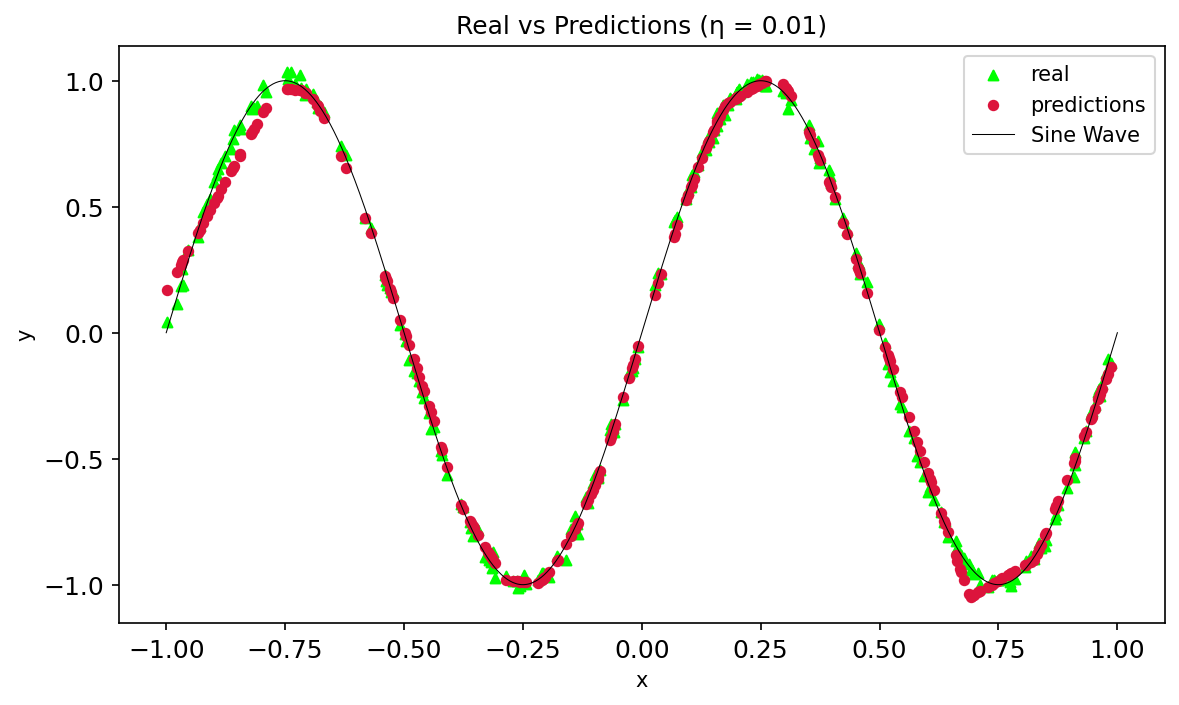

In [200]:
# Plot the results (True sine vs Model predictions)
figure = plt.figure(figsize = (9,5))
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
#plt.grid()
plt.scatter(xtest, ytest, label="real", s =22, marker = '^',color='lime')
plt.scatter(xtest, predictions, label="predictions",s=20, color='crimson')
plt.plot(xdata,sine,color='k',linewidth=0.5, label='Sine Wave')
plt.title('Real vs Predictions (η = 0.01)', fontsize=12)
plt.legend(fontsize=10)
plt.savefig(f'RealVsPred.png',bbox_inches='tight',dpi=150, format='png')


In [201]:
log = np.logspace(-8,2, 11)
Loss =[]
Hist = []
Pred = []
test_loss = []
test_mae = []
test_mse = []


for i in range(len(log)):
  lr = log[i]
  nhiddens = len(hiddens)

  model = tf.keras.models.Sequential()

  # First hidden layer
  model.add(tf.keras.layers.Dense(hiddens[0], activation=activation, input_shape=(1,),
                  bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                  kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                  ))

  # and the rest of the layers
  for ilayer in range(1,nhiddens):
      model.add(tf.keras.layers.Dense(hiddens[ilayer], activation=activation,
                      bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                      kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                      ))

  # final layer
  model.add(tf.keras.layers.Dense(1,activation='linear',
                  bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                  kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),))


  model.compile(optimizer=tf.keras.optimizers.Adam(lr),  # optimizer
              loss=loss,   # loss function
              metrics=['mae','mse'])

  history = model.fit(xtrain, ytrain, epochs=n_epochs, batch_size=batch_size, validation_data=(xval, yval),
                  shuffle=True, verbose=0)
  Hist.append(history)


  predictions = model.predict(xtest)
  Pred.append(predictions)

  # Evaluate the model on test data
  tloss, tmae, tmse = model.evaluate(xtest, ytest)
  test_loss.append(tloss)
  test_mae.append(tmae)
  test_mse.append(tmse)






8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5541 - mae: 0.6682 - mse: 0.5541 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5533 - mae: 0.6679 - mse: 0.5533 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5464 - mae: 0.6646 - mse: 0.5464 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5004 - mae: 0.6386 - mse: 0.5004 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4144 - mae: 0.5573 - mse: 0.4144 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mae: 0.2000 - mse: 0.0717 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.0323 - mse: 0.0020 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5044 - mae: 0.6382 - mse: 0.5044 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
8/8 ━━━━━━

[]

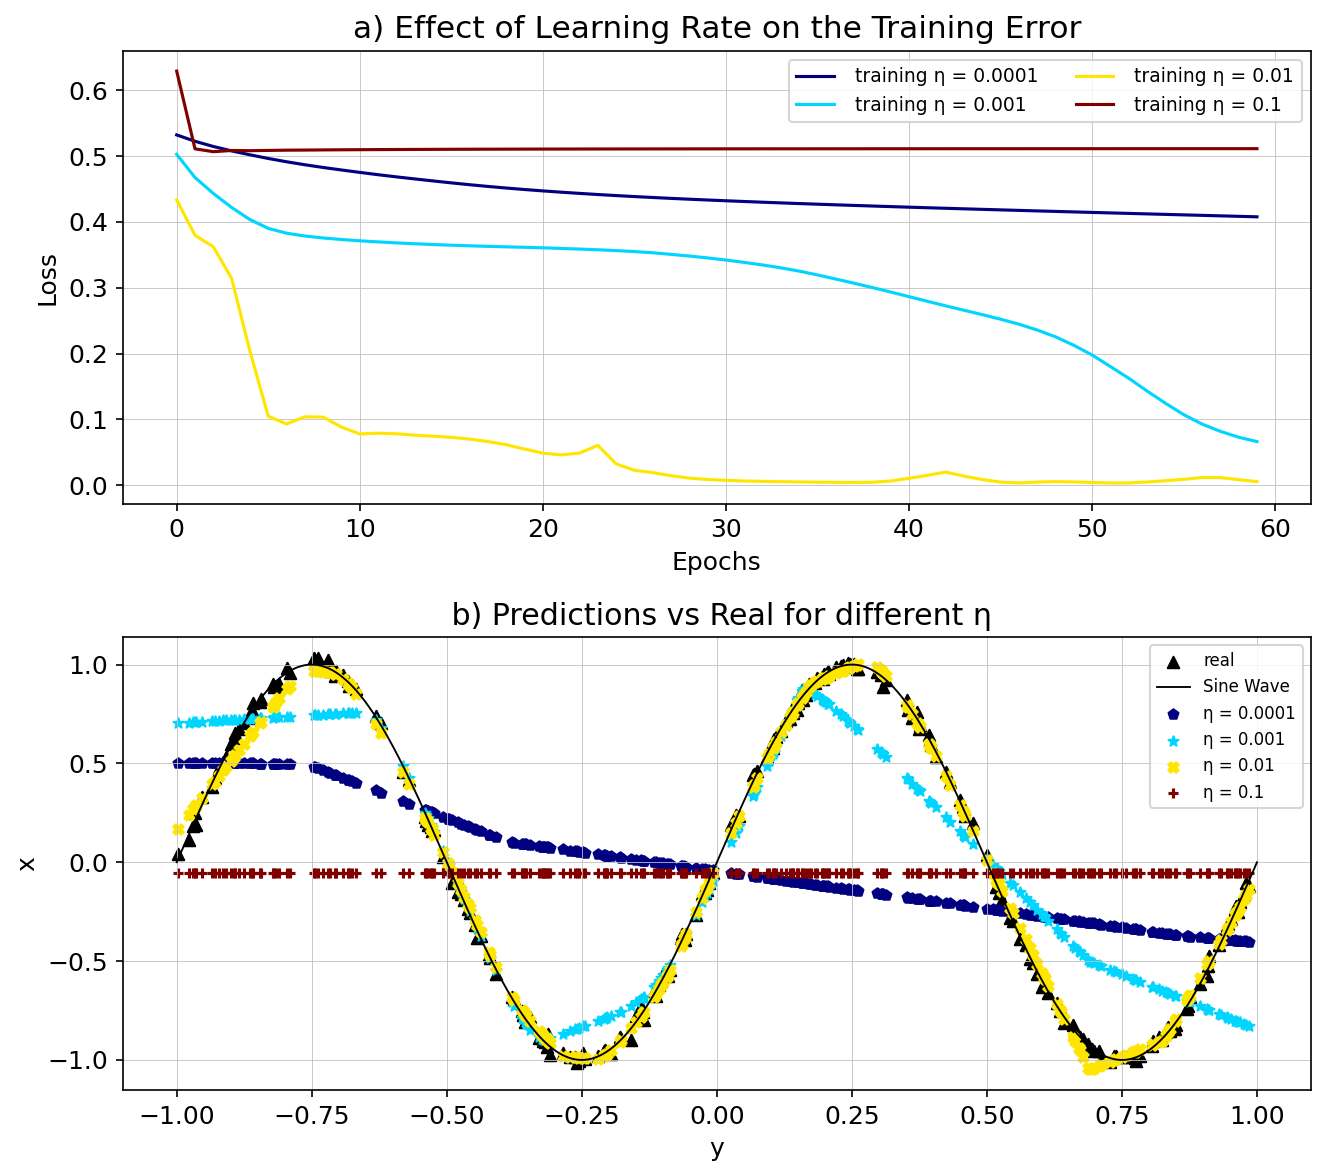

In [203]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(9,8))
ax1.set_title('a) Effect of Learning Rate on the Training Error',fontsize =15 )
ax1.set_xlabel('Epochs',fontsize =12)
ax1.set_ylabel('Loss',fontsize =12)

ax2.scatter(xtest, ytest, label="real", s=30, marker='^', color ='k' )
ax2.set_xlabel('y',fontsize =12)
ax2.set_ylabel('x',fontsize =12)
ax2.set_title(' b) Predictions vs Real for different η')
ax2.plot(xdata,sine,color='k',linewidth=0.9, label='Sine Wave')

# learning rates to plot
eta = [4,5,6,7]

#colormap
colormap = plt.cm.jet
colors = colormap(np.linspace(0, 1, len(eta)))

markers = ['^', 'o', 's', 'D', 'p', '*', 'X', '+', 'H']
for ind, i  in enumerate(eta):
  lr = log[i]
  ax1.plot(n,Hist[i].history['loss'], label = f' training η = {log[i]}', color=colors[ind])
  #ax1.plot(n,Hist[i].history['val_loss'], label='validation', linestyle='--', color=colors[ind])

  ax1.legend(fontsize=9, loc='upper right',ncol=2)


  ax2.scatter(xtest, Pred[i], label=f'η = {log[i]}', s=25, marker =f'{markers[i]}', color=colors[ind])
  ax2.legend(fontsize=8)

ax1.grid(color='silver', linestyle='-', linewidth=0.4)
ax2.grid(color='silver', linestyle='-', linewidth=0.4)

plt.tight_layout()

plt.savefig(f'4etas.png',bbox_inches='tight',dpi=150, format='png')
plt.plot()

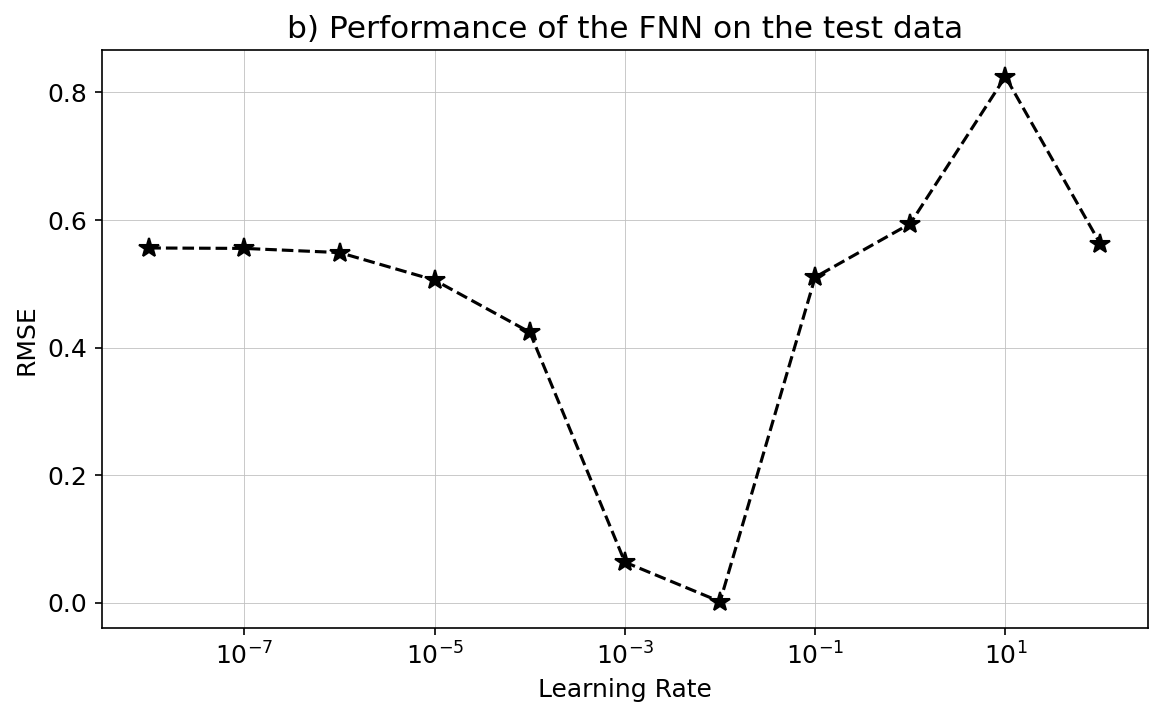

In [204]:
figure = plt.figure(figsize = (9,5))
plt.title('b) Performance of the FNN on the test data',fontsize =15 )
plt.xlabel('Learning Rate',fontsize =12)
plt.ylabel('RMSE',fontsize =12)
plt.xscale('log')
plt.plot(log,test_mse, linestyle='--',  marker ='*',color='k', markersize=10)


plt.grid(color='silver', linestyle='-', linewidth=0.4)

plt.savefig(f'Performance.png',bbox_inches='tight',dpi=150, format='png')



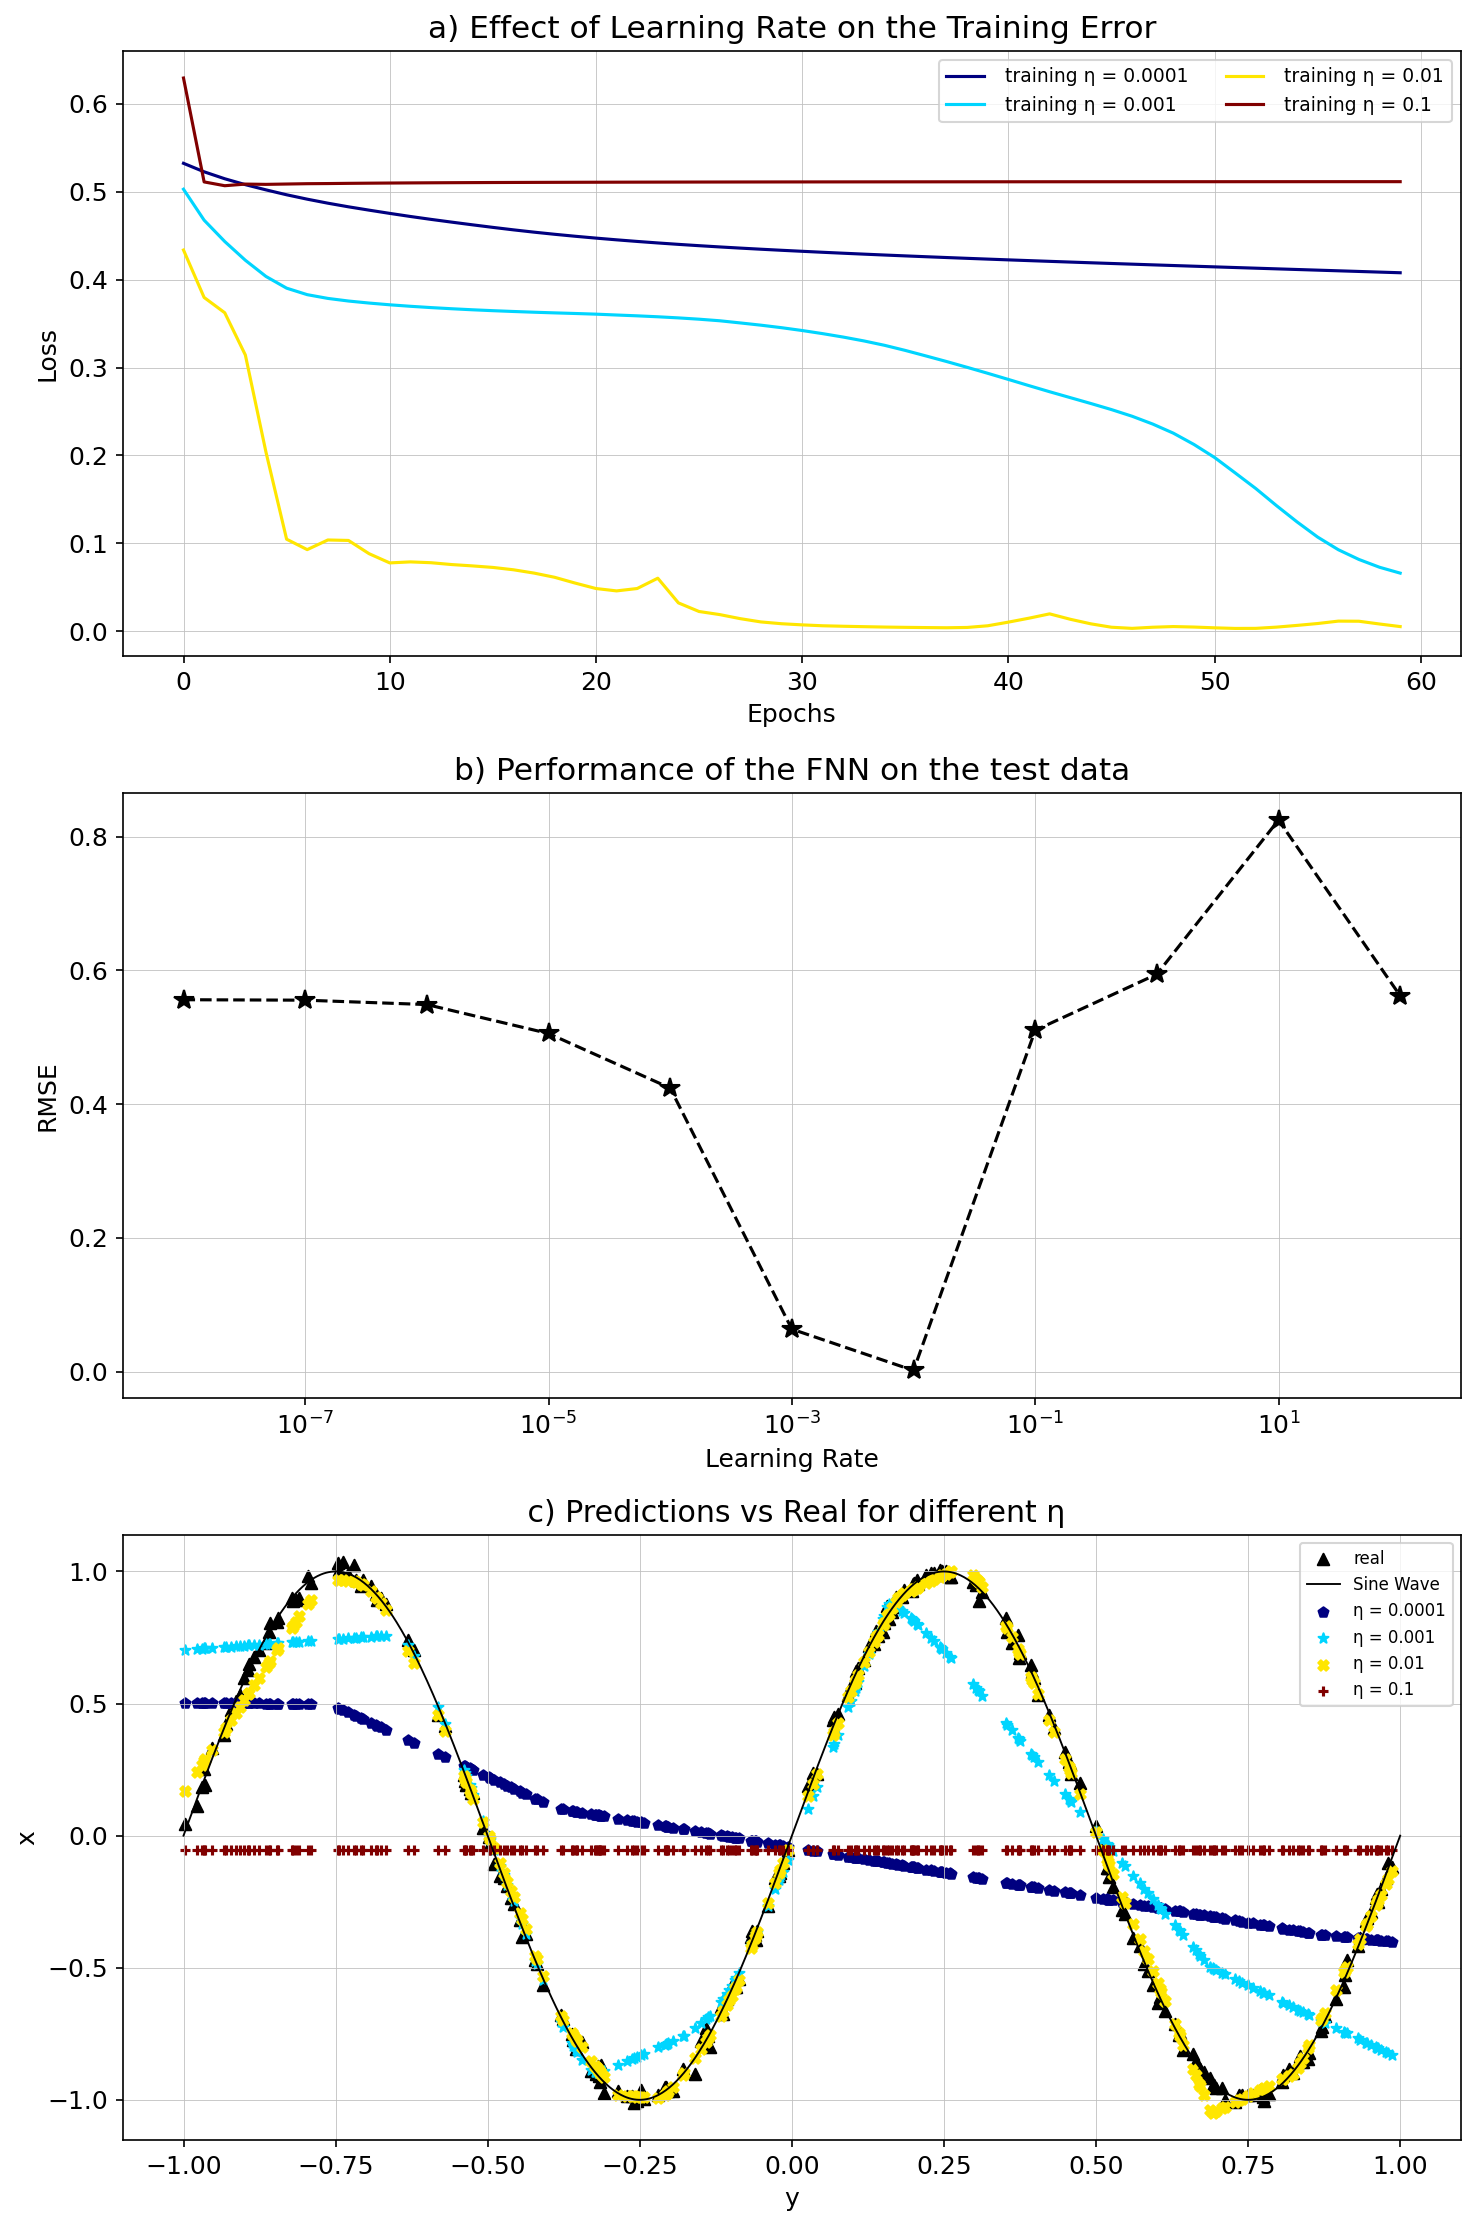

In [202]:
# #Hist[0].history['loss']
# fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(10,15))
# ax1.set_title('a) Effect of Learning Rate on the Training Error',fontsize =15 )
# ax1.set_xlabel('Epochs',fontsize =12)
# ax1.set_ylabel('Loss',fontsize =12)

# ax2.set_title('b) Performance of the FNN on the test data',fontsize =15 )
# ax2.set_xlabel('Learning Rate',fontsize =12)
# ax2.set_ylabel('RMSE',fontsize =12)
# ax2.set_xscale('log')
# ax2.plot(log,test_mse, linestyle='--',  marker ='*',color='k', markersize=10)


# ax3.scatter(xtest, ytest, label="real", s=30, marker='^', color ='k' )
# ax3.set_xlabel('y',fontsize =12)
# ax3.set_ylabel('x',fontsize =12)
# ax3.set_title(' c) Predictions vs Real for different η')
# ax3.plot(xdata,sine,color='k',linewidth=0.9, label='Sine Wave')

# # learning rates to plot
# eta = [4,5,6,7]

# #colormap
# colormap = plt.cm.jet
# colors = colormap(np.linspace(0, 1, len(eta)))

# markers = ['^', 'o', 's', 'D', 'p', '*', 'X', '+', 'H']
# for ind, i  in enumerate(eta):
#   lr = log[i]
#   ax1.plot(n,Hist[i].history['loss'], label = f' training η = {log[i]}', color=colors[ind])
#   #ax1.plot(n,Hist[i].history['val_loss'], label='validation', linestyle='--', color=colors[ind])

#   ax1.legend(fontsize=9, loc='upper right',ncol=2)


#   ax3.scatter(xtest, Pred[i], label=f'η = {log[i]}', s=25, marker =f'{markers[i]}', color=colors[ind])
#   ax3.legend(fontsize=8)

# ax1.grid(color='silver', linestyle='-', linewidth=0.4)
# ax2.grid(color='silver', linestyle='-', linewidth=0.4)
# ax3.grid(color='silver', linestyle='-', linewidth=0.4)
# plt.tight_layout()

# plt.savefig('plots.png')